# Problem Statement

### To predict the price of used cars in India.

## Objective:

<p style = "font-size : 16px ; color: black;font-family:TimesNewRoman">
  Nowadays the prices of new cars in the industry is fixed by the manufacturer with some additional costs incurred by goverment in the form of taxes.but due to increased price of new cars and the incapabilty of customers to buy a new car due to lack of funds used cars sales are on a global increase.So there is need for used cars price prediction system to determine worthiness of car using variety of features.We have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.</p>

# Attribute Information
<br>
<p style = "font-size : 18px ; color: black;font-family:TimesNewRoman">
    
1. S.No. : Serial Number<br>
    
2. Name : Name of the car which includes Brand name and Model name<br>
    
3. Location : The location in which the car is being sold or is available for purchase Cities<br>
    
4. Year : Manufacturing year of the car<br>
    
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.<br>
    
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)<br>
    
7. Transmission : The type of transmission used by the car. (Automatic / Manual)<br>
    
8. Owner : Type of ownership<br>
    
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg<br>
    
10. Engine : The displacement volume of the engine in CC.<br>
    
11. Power : The maximum power of the engine in bhp.<br>
    
12. Seats : The number of seats in the car.<br>
    
13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)<br>
    
14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)<br>
</p>

## Problem
<p style = "font-size : 15px ; color: black;font-family:TimesNewRoman">

- Does various predicating factors effect the price of the used car .?<br>
- What all  independent variables effect the pricing of used cars?<br>
- Does name of a car have any effect on  pricing of car.?<br>
- How does type of Transmission  effect  pricing?<br>
- Does Location in which the car being sold has any effect on the price?<br>
- Does kilometers_Driven,Year of manufacturing  have negative correlation with  price of the car?<br>
- Does Mileage ,Engine and Power have any effect on the pricing of the car?<br>
- How does number of seat ,Fuel type effect the pricing.?<br>
</p>

## Libraries

In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os



# To enable plotting graphs in Jupiter notebook
%matplotlib inline

## Load and explore data

In [2]:
os.chdir("C:/")

In [3]:
df_usedcars=pd.read_csv('used_cars_data.csv')
print(df_usedcars)

      S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type

In [4]:
df1=df_usedcars.copy()

In [5]:
df1.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
df1.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [7]:
df1.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [8]:
df1.shape

(7253, 14)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


## Observations

* There are 7353 rows and 14 columns
* Dependant variable is  price
* There are 5 numeric variable and 9 catagorical variables, some of numeric variables are in object type so we have to convert it.
* There are null values present in data which we have to fix

## Let us look at the missing values

In [10]:
df1.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [11]:
missing=df1.columns[df1.isnull().any()]
df1[missing].isnull().sum()

Mileage         2
Engine         46
Power          46
Seats          53
New_Price    6247
Price        1234
dtype: int64

In [12]:
# Find missing data percentage
#percent_missing = df. isnull(). sum() * 100 / len(df)
percentage_missing=df1[missing].isnull().sum()*100/len(df1)
percentage_missing

Mileage       0.027575
Engine        0.634220
Power         0.634220
Seats         0.730732
New_Price    86.129877
Price        17.013650
dtype: float64

## Observations
* New_Price has only 1006 values 86 % values are missing.
* Price which is a Target variable with 17 % missing values.
* Seats has only 53 values missing and number of seats can be one of key factor in deciding price.
* Power and Engine has 46 missing values.
* Mileage has only 2 missing values.
* Mileage,Power,Engine,New_Price we know are quantitative variables but are of object dtype here and needs to to converted to numeric.

In [13]:
# Create catagorical column list
catagorical_columns=df1.select_dtypes(include=object).columns.tolist()
catagorical_columns

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'New_Price']

In [14]:
# Check count of unique values in catagorical columns
for col in catagorical_columns:
    print(df1[col].value_counts())
    print("#" * 40)

Mahindra XUV500 W8 2WD                 55
Maruti Swift VDI                       49
Maruti Swift Dzire VDI                 42
Honda City 1.5 S MT                    39
Maruti Swift VDI BSIV                  37
                                       ..
Jaguar XJ 3.0L Portfolio LWB            1
Chevrolet Optra 1.6 Elite               1
Volkswagen Polo ALLSTAR 1.2 MPI         1
Volkswagen Polo 1.0 MPI Comfortline     1
Hyundai Xcent 1.2 VTVT SX               1
Name: Name, Length: 2041, dtype: int64
########################################
Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
########################################
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
########################################
Manual       5204
Automatic    204

 ## Observations
 * Max cars available are of brand and model- Mahindra XUV500 W8 2WD
 * Maximum car being sold have fuel type as Diesel.
 * Mumbai has highest numbers of car available for purchase.
 * 5204 cars with Manual transmission are available for purchase.

## Data Preprocessing:


### Feature Engineering

In [15]:
# Drop columns having more than 40 % missing data
# New price column contain 86% missing values hence drop it.
df1.drop(['New_Price'], axis = 1,inplace=True)

In [16]:
#Extract the Brand and Model column from Name column
df1["Brand"]=df1['Name'].str.split(expand=True)[0]
df1["Model"]=df1['Name'].str.split(expand=True)[1]

In [17]:
#Split the Values and Unit from Mileage,Engine,Power column
df1["Mileage_value"]=df1['Mileage'].str.split(expand=True)[0]
df1["Engine_value"]=df1['Engine'].str.split(expand=True)[0]
df1["Power_value"]=df1['Power'].str.split(expand=True)[0]

In [18]:
df1['Mileage_value'].dtype

dtype('O')

In [19]:
# Covert data type from string to float
df1['Mileage_value']=df1['Mileage_value'].astype(float)
df1['Engine_value']=df1['Engine_value'].astype(float)


In [20]:
df1['Power_value'].value_counts()

74        280
98.6      166
73.9      152
140       142
null      129
         ... 
114.4       1
360         1
78.8        1
152.88      1
95          1
Name: Power_value, Length: 386, dtype: int64

In [21]:
# Power value column contain null value so replace it by np.nan
df1['Power_value'].replace('null',np.nan,inplace=True)

In [22]:
df1['Power_value']=df1['Power_value'].astype(float)  # Covert data type from string to float

#### Missing Value Treatment

###### Lets fill missing values of mileage, engine and power value by median and groupby for more granularity


In [23]:
# Mileage_value
df1['Mileage_value'].min()

0.0

In [24]:
df1['Mileage_value'].max()

33.54

In [25]:
df1['Mileage_value'].replace(0,np.nan,inplace=True)

In [26]:
df1['Mileage_value'].isnull().sum()

83

In [27]:
df1['Mileage_value'].median()

18.2

In [28]:
df1['Mileage_value'].fillna(18.2, inplace=True)

In [29]:
df1['Mileage_value'].isnull().sum()

0

In [30]:
# Engine_value
df1['Engine_value'].min()

72.0

In [31]:
df1["Engine_value"]=df1.groupby(['Brand', 'Model'])['Engine_value'].transform(lambda x : x.fillna(x.median()))

In [32]:
df1['Engine_value'].isnull().sum()

0

In [33]:
# Power_value
df1['Power_value'].min()

34.2

In [34]:
# Fill null values by groupby 'Brand' and 'model' and median of Power_value
df1["Power_value"]=df1.groupby(['Brand', 'Model'])['Power_value'].transform(lambda x : x.fillna(x.median()))

In [35]:
df1['Power_value'].isnull().sum()

12

In [36]:
# Again apply same to remove null values by groupby 'Brand'  and median of Power_value
df1["Power_value"]=df1.groupby(['Brand'])['Power_value'].transform(lambda x : x.fillna(x.median()))

In [37]:
df1['Power_value'].isnull().sum()

2

In [38]:
df1['Power_value'].median()

92.7

In [39]:
df1["Power_value"].fillna(92.7,inplace=True)

In [40]:
df1['Power_value'].isnull().sum()

0

In [41]:
## Lets fix null values of seats
df1["Seats"].value_counts()

5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

In [42]:
df1['Seats'].median()

5.0

In [43]:
# Lets replace 0 and null values by median-5
df1["Seats"].fillna(5, inplace = True)

In [44]:
df1['Seats'].replace(0,5,inplace=True)

In [45]:
df1['Seats'].isnull().sum()

0

In [46]:
## Lets fix null values for Price
df1['Price'].isnull().sum()

1234

In [47]:
df1['Price'].min()

0.44

In [48]:
# Fill null values by groupby 'Brand' and 'model' and median of Price
df1["Price"]=df1.groupby(['Brand', 'Model'])['Price'].transform(lambda x : x.fillna(x.median()))

In [49]:
df1['Price'].isnull().sum()

7

In [50]:
df1["Price"].median()

5.59

In [51]:
# Fill remaing null values by median of price column
df1["Price"].fillna(5.59,inplace=True)

In [52]:
df1['Price'].isnull().sum()

0

###### Check for max value of Kilometer driven
###### The Maxmimun reading on odometer must be up to 1,10,000. Therefore, replace those readings which have more than 1,10,000 with median 

In [53]:
df1['Kilometers_Driven'].max()

6500000

In [54]:
# So we have to replace kilometer driven values exceeding 1,10,000 km by median of column
df1['Kilometers_Driven'].median()

53416.0

In [55]:
# Replace Value
df1['Kilometers_Driven']=np.where((df1['Kilometers_Driven']>=109999.99),53416,df1['Kilometers_Driven'])

In [56]:
# check max value
df1['Kilometers_Driven'].max()

109703

In [57]:
df1.isna().sum()

S.No.                 0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               46
Power                46
Seats                 0
Price                 0
Brand                 0
Model                 0
Mileage_value         0
Engine_value          0
Power_value           0
dtype: int64

In [58]:
# Lets drop Name, Mileage, Engine and POwer column
df1.drop(['S.No.','Mileage','Engine','Power','Name'],axis=1,inplace=True)

In [59]:
df1.isna().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
Brand                0
Model                0
Mileage_value        0
Engine_value         0
Power_value          0
dtype: int64

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Seats              7253 non-null   float64
 7   Price              7253 non-null   float64
 8   Brand              7253 non-null   object 
 9   Model              7253 non-null   object 
 10  Mileage_value      7253 non-null   float64
 11  Engine_value       7253 non-null   float64
 12  Power_value        7253 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


## Summary of the data

In [61]:
df1.describe()

,Year,Kilometers_Driven,Seats,Price,Mileage_value,Engine_value,Power_value
count,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000
mean,2013.365366,51293.529436,5.278368,9.311626,18.344850,1615.556322,112.181453
std,3.254421,23442.970204,0.806668,10.751377,4.134077,594.317617,53.402579
min,1996.000000,171.000000,2.000000,0.440000,6.400000,72.000000,34.200000
25%,2011.000000,34000.000000,5.000000,3.500000,15.400000,1198.000000,74.000000
50%,2014.000000,53416.000000,5.000000,5.590000,18.200000,1493.000000,92.700000
75%,2016.000000,67000.000000,5.000000,9.850000,21.100000,1968.000000,138.030000
max,2019.000000,109703.000000,10.000000,160.000000,33.540000,5998.000000,616.000000


In [62]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,51293.529436,23442.970204,171.00,34000.0,53416.00,67000.00,109703.00
Seats,7253.0,5.278368,0.806668,2.00,5.0,5.00,5.00,10.00
Price,7253.0,9.311626,10.751377,0.44,3.5,5.59,9.85,160.00
Mileage_value,7253.0,18.344850,4.134077,6.40,15.4,18.20,21.10,33.54
Engine_value,7253.0,1615.556322,594.317617,72.00,1198.0,1493.00,1968.00,5998.00
Power_value,7253.0,112.181453,53.402579,34.20,74.0,92.70,138.03,616.00


In [63]:
df1.describe(include='object').T

,count,unique,top,freq
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952
Brand,7253,33,Maruti,1444
Model,7253,219,Swift,418


## Observations:
* Years is left skewed. Years ranges from 1996- 2019.

- Mileage and  Kilometer driven  is almost Normally distributed.

- Engine is right skewed and has outliers on higher  and lower end

- Power and Price are also right skewed.


# Exploratory Data Analysis

In [64]:
# Create numeric column list
Numeric_columns=df1.select_dtypes(include=np.number).columns.tolist()
Numeric_columns

['Year',
 'Kilometers_Driven',
 'Seats',
 'Price',
 'Mileage_value',
 'Engine_value',
 'Power_value']

In [65]:
# Create catagorical column list
catagorical_columns=df1.select_dtypes(include=object).columns.tolist()
catagorical_columns

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Model']

In [66]:
cat_columns=['Location','Fuel_Type','Transmission', 'Owner_Type', 'Brand']

In [67]:
## Function to create barplots that indicates Catagorical data
def perc_on_bar(plot, feature):
    #plot
    #feature:categorical feature
    #the function won't work if a column is passed in hue parameter
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100* p.get_height()/total) # percentage of each class category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x,y), size = 12) # annotate the percentage
    plt.show() # show the plot

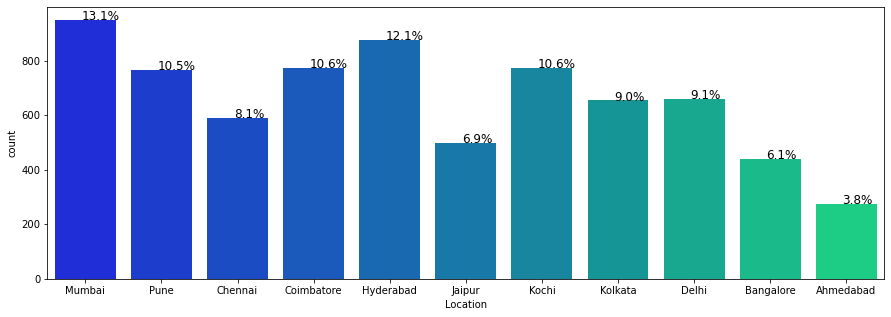

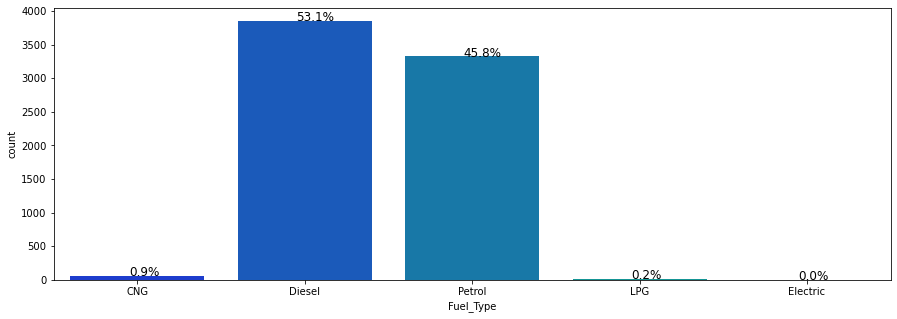

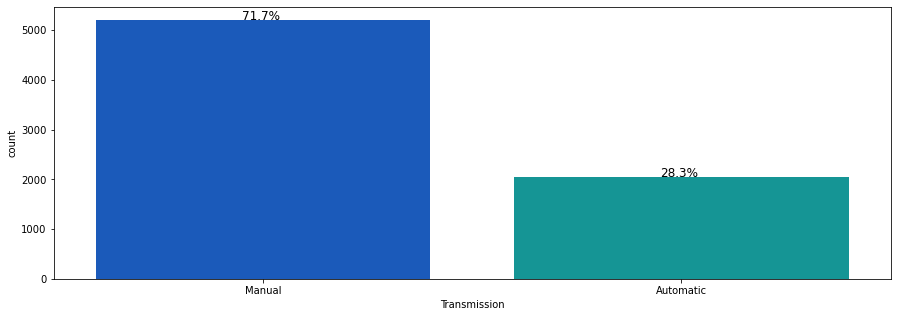

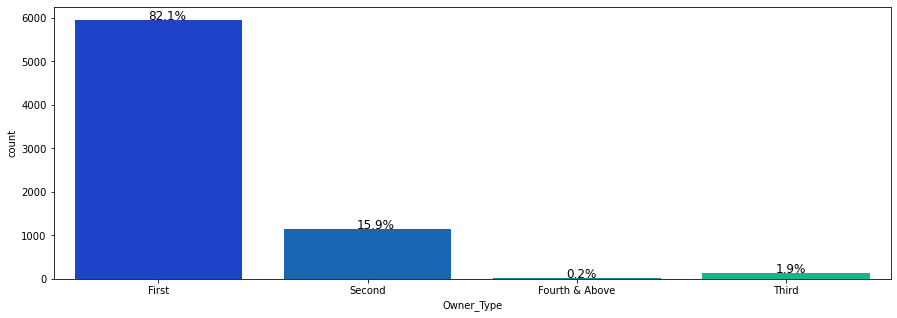

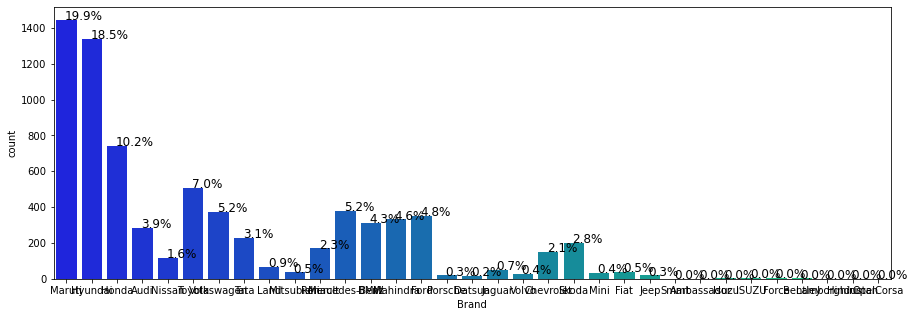

In [68]:
## # Visualizing and Understanding distribution of Individual category by using Bar plot
for i in cat_columns:
    plt.figure(figsize=(15,5))
    ax=sns.countplot(df1[i],palette='winter')
    perc_on_bar(ax,df1[i])

### Observations:
    
* 71 % cars available for sell have manual Transmission.
* 82 % cars are First owned cars.
* 39% of car available for sale are from  Maruti & Hyundai brands.
* 53% of car being sold/available for purchase  have fuel type as Diesel .
* Mumbai has highest numbers of car available for purchase whereas Ahmedabad has least

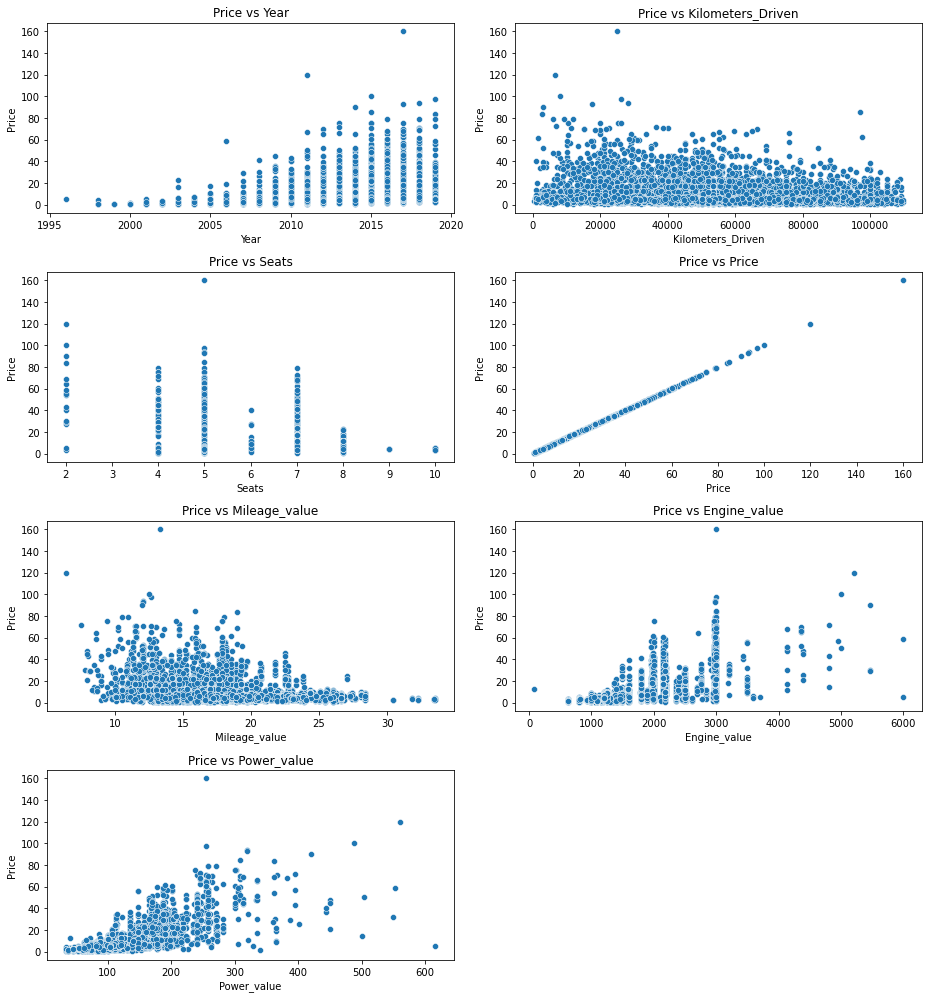

In [69]:
plt.figure(figsize=(13,17))

for i, variable in enumerate(Numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=df1[variable],y=df1['Price']).set(title='Price vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

### Bivariate & Multivariate Analysis

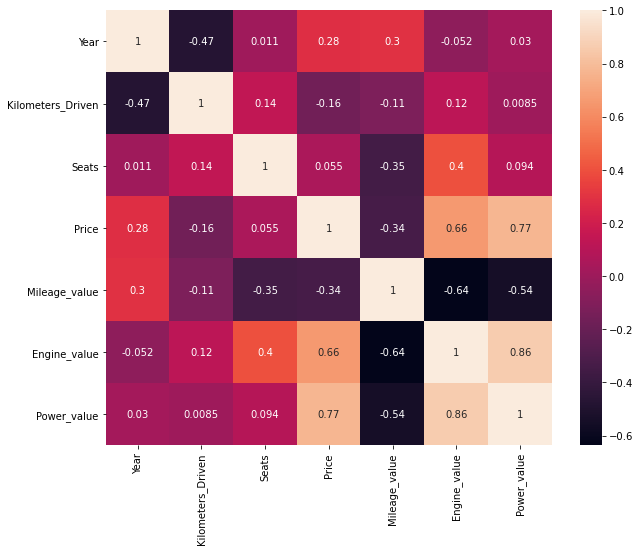

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True)
plt.show()

* Engine has strong positive correlation to Power [0.86]. 
* Price has positive correlation to Engine [0.66] as well Power [0.77].
* It means as Engine and Power increase , price of the car seems to increase.
* Mileage is negative correlated to Engine,Power,Price
* Price has negative  correlation to mileage.
* Kilometer driven doesnt impact Price

### Variables that are correlated with Price variable

#### Price Vs Engine Vs Transmission

<AxesSubplot:title={'center':'Price VS Engine based on Transmission'}, xlabel='Price', ylabel='Engine_value'>

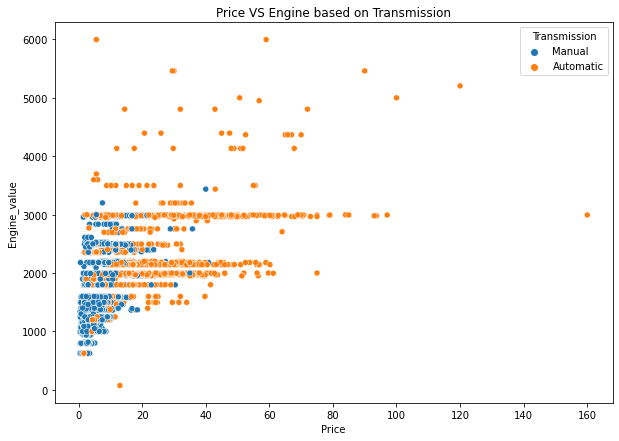

In [71]:
# understand relationship of Engine vs Price and Transmission
plt.figure(figsize=(10,7))

plt.title("Price VS Engine based on Transmission")
sns.scatterplot(y='Engine_value', x='Price', hue='Transmission', data=df1)

#### Price Vs Power Vs Transmission

<AxesSubplot:title={'center':'Price vs Power based on Transmission'}, xlabel='Price', ylabel='Power_value'>

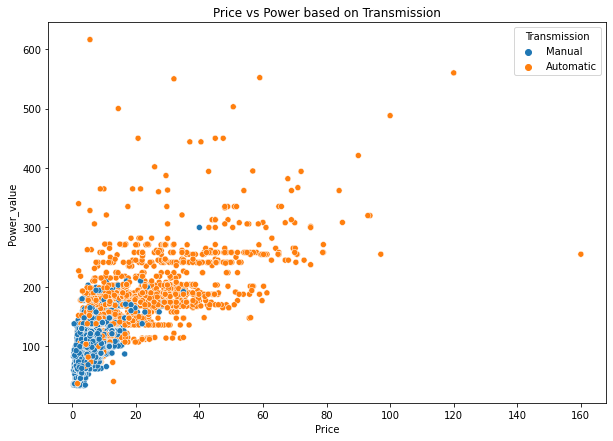

In [72]:
 #understand relationship betweem Price and Power
plt.figure(figsize=(10,7))
plt.title("Price vs Power based on Transmission")
sns.scatterplot(y='Power_value', x='Price', hue='Transmission', data=df1)

#### Price Vs Mileage Vs Transmission

<AxesSubplot:xlabel='Price', ylabel='Mileage_value'>

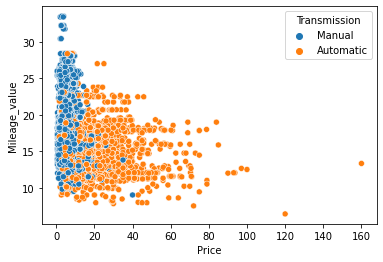

In [73]:
# Understand the relationships  between mileage and Price
sns.scatterplot(y='Mileage_value', x='Price', hue='Transmission', data=df1)

#### Price Vs Seat

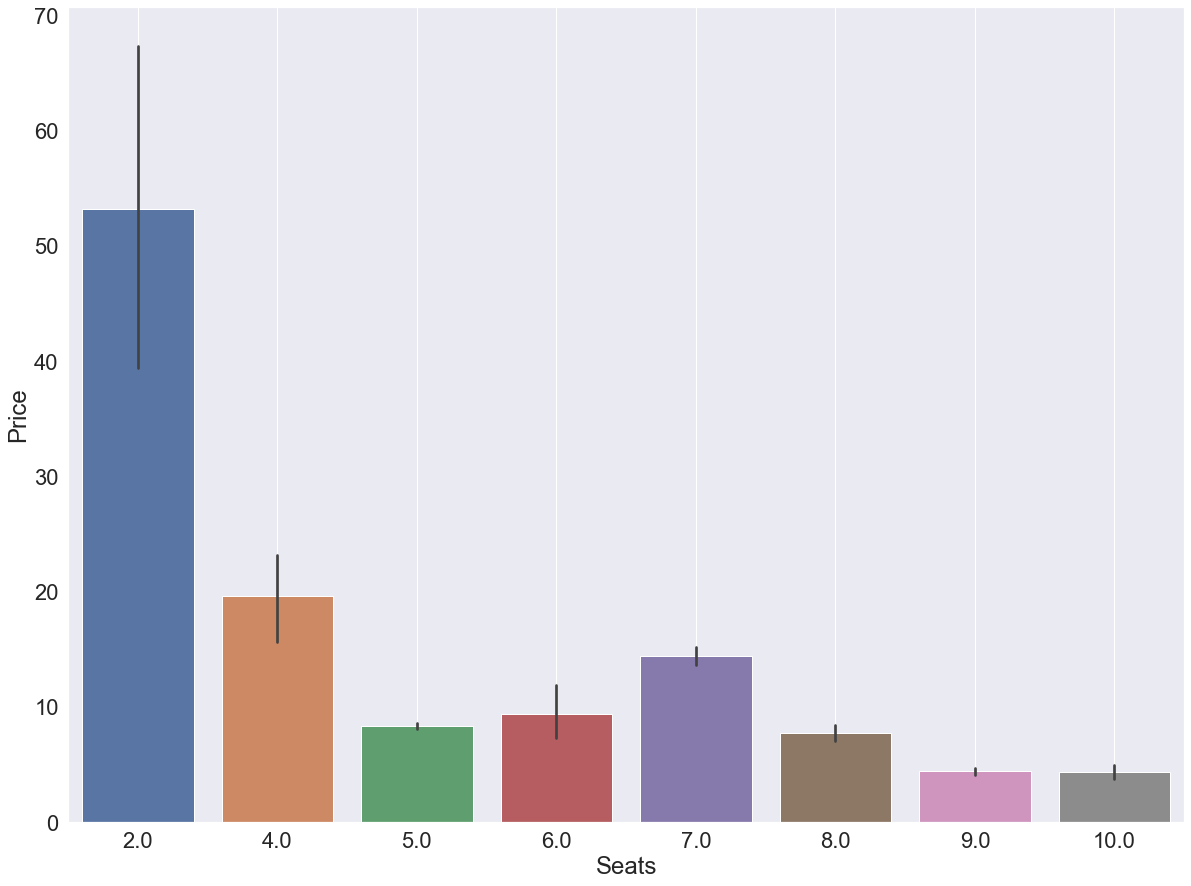

In [74]:
#Price and seats 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Seats', y='Price', data=df1)
plt.grid()

#### Price Vs Location

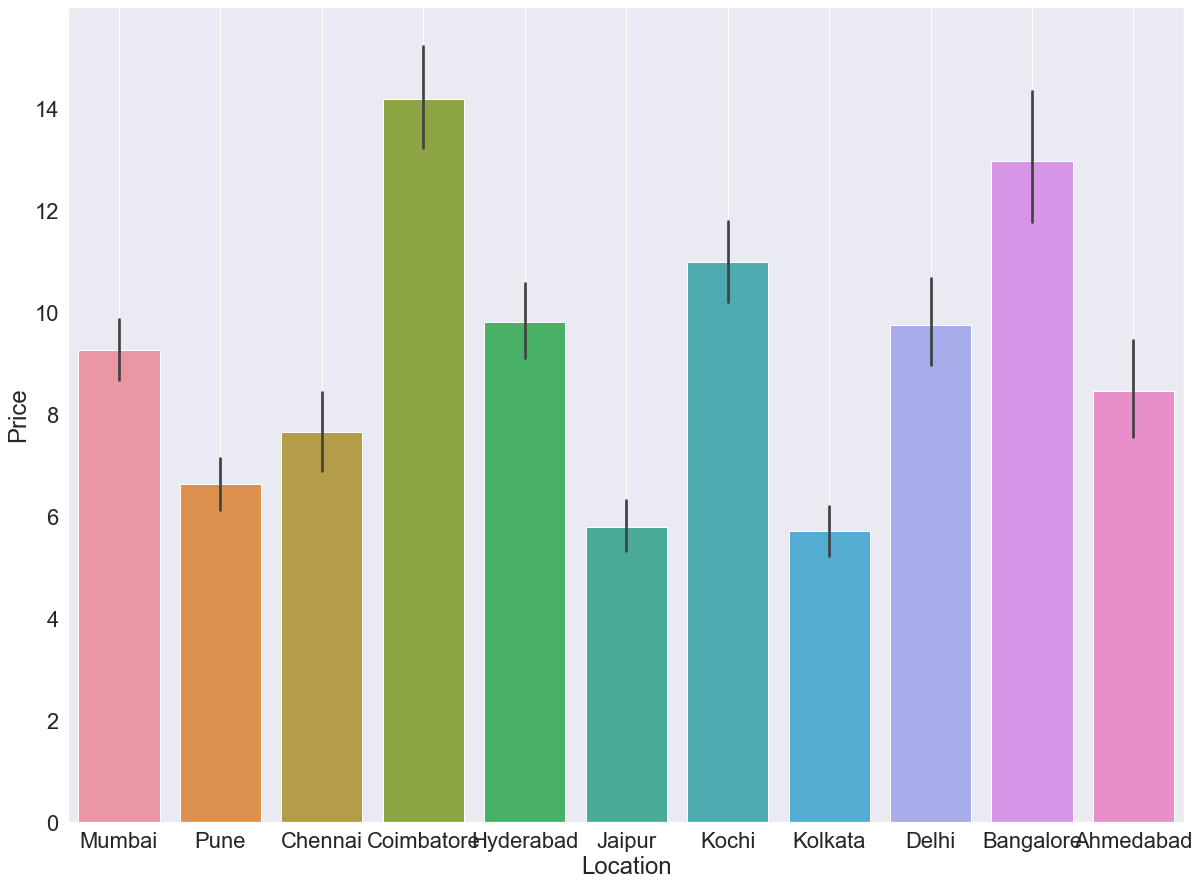

In [75]:
#Price and seats 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Location', y='Price', data=df1)
plt.grid()

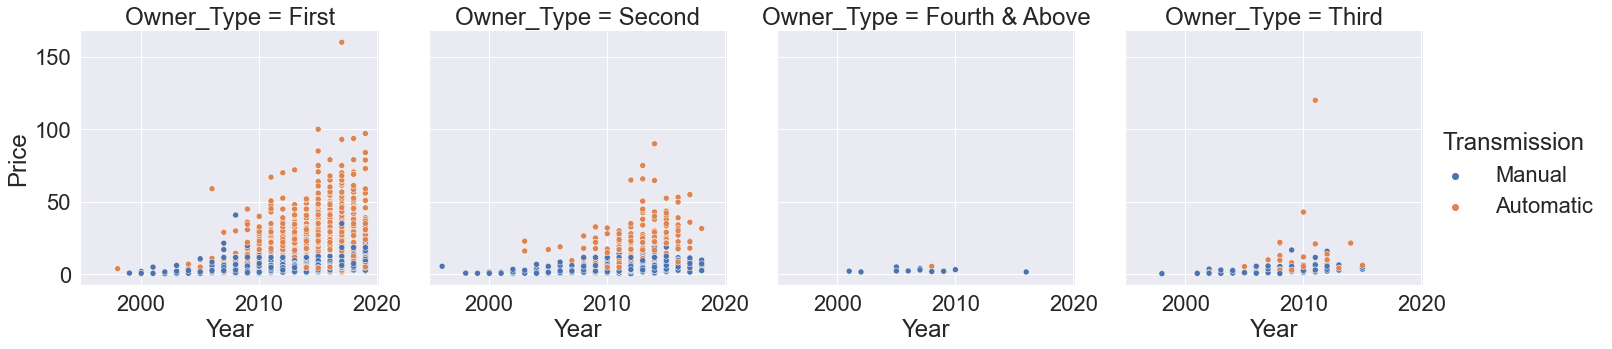

In [77]:
sns.relplot(data=df1, y='Price',x='Year',col='Owner_Type',hue='Transmission',aspect=1,height=5)

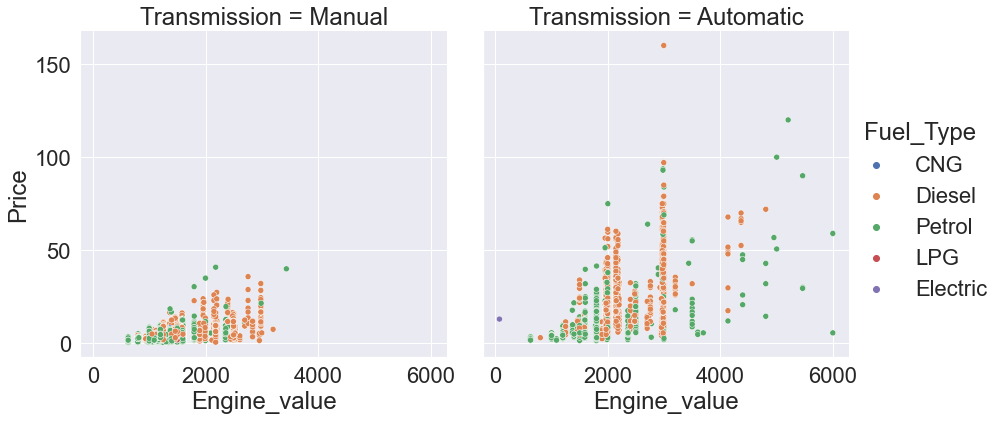

In [78]:
sns.relplot(data=df1, y='Price',x='Engine_value',col='Transmission',aspect=1,height=6,hue="Fuel_Type")

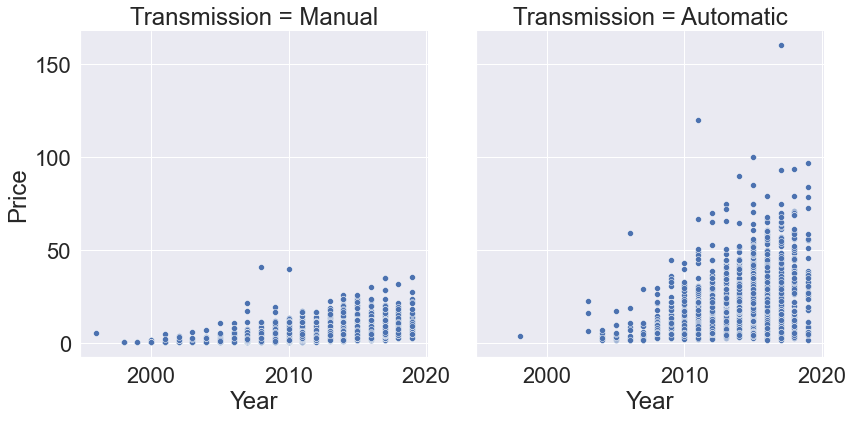

In [79]:
sns.relplot(data=df1, y='Price',x='Year',col='Transmission',aspect=1,height=6)

# Insights based on EDA

### Observations
* Expensive cars are in Coimbatore and Banglore.
* 2 Seater cars are more expensive.
* Diesel Fuel type car are more expensive compared to other fuel type.
* As expected, Older model are sold cheaper compared to latest model
* Automatic transmission vehicle have a higher price than manual transmission vehicles.
* Vehicles with more engine capacity have higher prices. 
* Price decreases as number of owner increases.
* Automatic transmission require high engine and power.
* Prices for Cars with fuel type as Diesel has increased with recent models 
* Engine,Power, how old the car is, Mileage,Fuel type,location,Transmission effect the price.

### Outlier detection & handelling

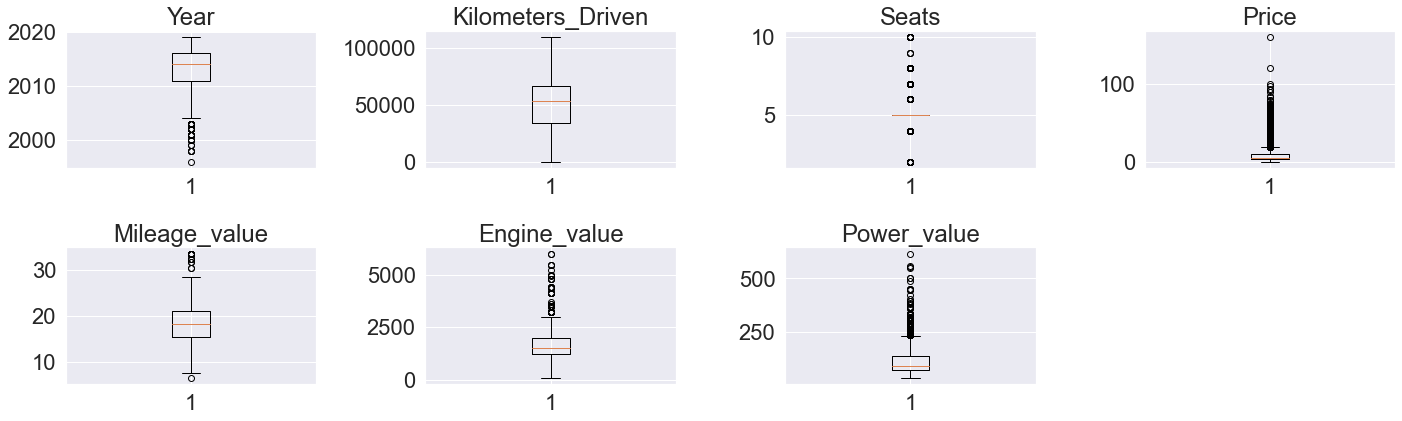

In [80]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(Numeric_columns):
                     plt.subplot(10,4,i+1)
                     plt.boxplot(df1[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)
                    
plt.show()

<p style = "font-size : 20px ; color: black;font-family:TimesNewRoman">
    <b>Observations</b></p>

- Mileage and Kilometer Driven is almost Normally distributed. 
- Engine ,power  are  right skewed and has outliers on upper side.
- Year is left skewed having outliers on left side , Seat and price are right skewed. 
- As we can see, outliers are present in the data, so lets fix the outliers.
- From five point summary we can see conclude that, all the extreme values/outliers are due to different car model,there manufacturing year and price so we can not drop it.

### Normalization of skewed distribution

In [81]:
## Lets visualize histogram to see distribution, If distribution is skewed , it is advice to use log transformation

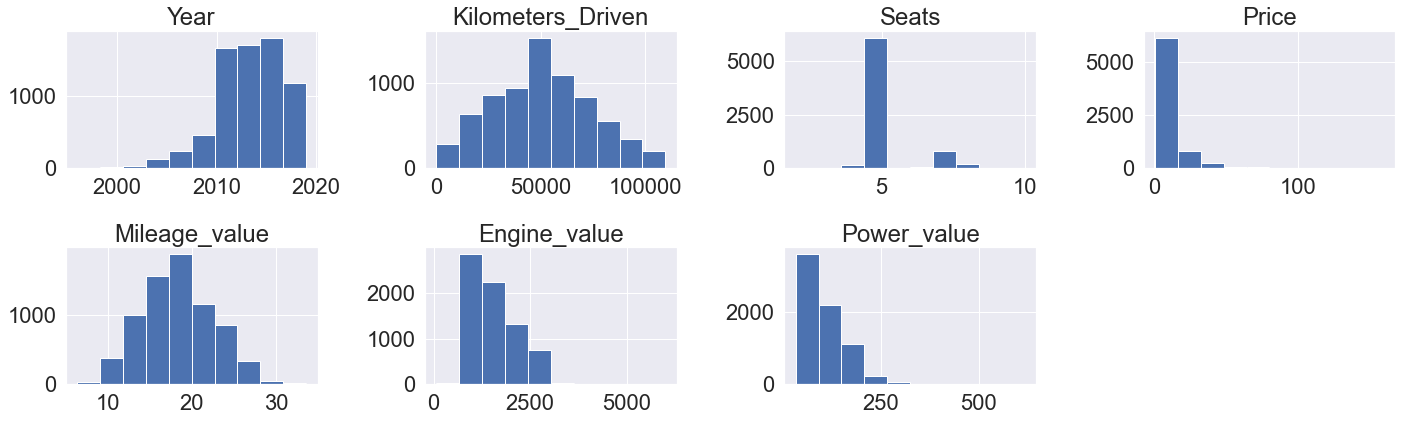

In [82]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(Numeric_columns):
                     plt.subplot(10,4,i+1)
                     plt.hist(df1[variable])
                     plt.tight_layout()
                     plt.title(variable)
                    
plt.show()

In [83]:
# # list Of columns which needs transformation

Cluttered_columns=['Year','Seats',"Engine_value","Power_value",'Price']

In [84]:
def Transform (Cluttered_columns):
    df1[Cluttered_columns]=np.log1p(df1[Cluttered_columns])

In [85]:
for i in Cluttered_columns:
    Transform(i)

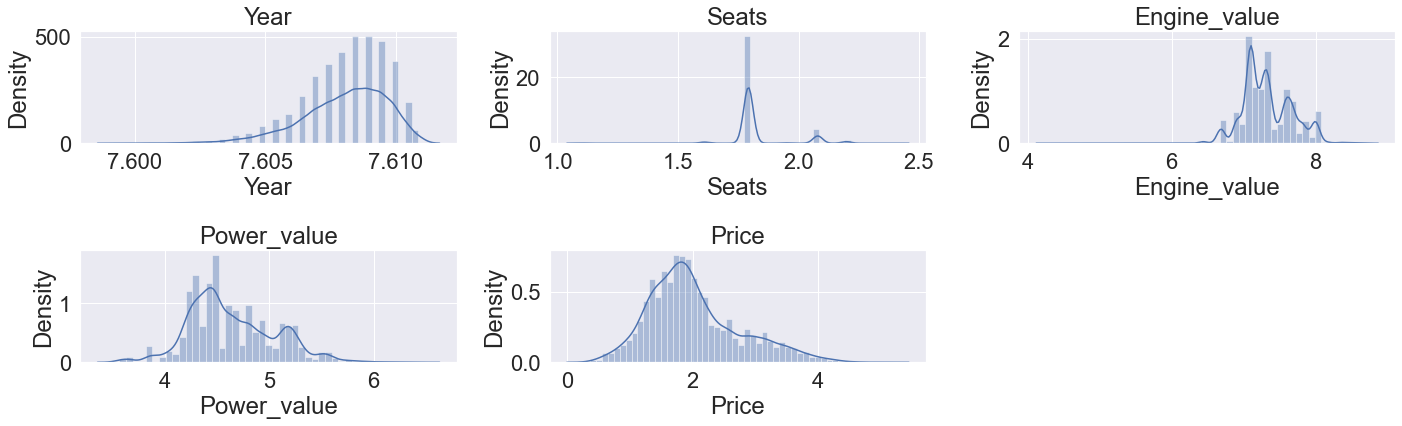

In [86]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(Cluttered_columns):
                     plt.subplot(10,3,i+1)
                     sns.distplot(df1[variable])
                     plt.tight_layout()
                     plt.title(variable)
                    
plt.show()

# Model Building

In [87]:
df1.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'Brand', 'Model', 'Mileage_value',
       'Engine_value', 'Power_value'],
      dtype='object')

In [88]:
df1=df1.sample(frac=1)    # shuffling the data

In [89]:
# Defining X and Y variables

x= df1.drop(['Price'],axis=1)
y= df1[['Price']]

print(x.head())
print(y.head())

       Location      Year  Kilometers_Driven Fuel_Type Transmission  \
7155     Mumbai  7.608374              45000    Diesel    Automatic   
3124    Chennai  7.609367              89000    Diesel       Manual   
455   Hyderabad  7.609367              80219    Diesel       Manual   
5216    Chennai  7.606885              53416    Diesel    Automatic   
1178      Kochi  7.608374              86925    Diesel    Automatic   

     Owner_Type     Seats          Brand    Model  Mileage_value  \
7155      First  1.791759  Mercedes-Benz      New          19.27   
3124      First  2.079442       Mahindra   XUV500          16.00   
455       First  1.791759         Maruti  Celerio          27.62   
5216      First  1.791759     Volkswagen    Jetta          16.96   
1178      First  1.791759          Volvo     XC60          11.20   

      Engine_value  Power_value  
7155      7.670429     5.127648  
3124      7.687080     4.948760  
455       6.677083     3.871201  
5216      7.585281     4.935

In [90]:
print(x.shape)
print(y.shape)

(7253, 12)
(7253, 1)


## Create Dummies

In [91]:
catagorical_columns = x.columns[x.dtypes == 'object']

catagorical_columns

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')

In [92]:
# one hot encoding method
x= pd.get_dummies(x,columns=catagorical_columns,drop_first=True)
x.head()

,Year,Kilometers_Driven,Seats,Mileage_value,Engine_value,Power_value,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Model_Xcent,Model_Xenon,Model_Xylo,Model_Yeti,Model_Z4,Model_Zen,Model_Zest,Model_i10,Model_i20,Model_redi-GO
7155,7.608374,45000,1.791759,19.27,7.670429,5.127648,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3124,7.609367,89000,2.079442,16.00,7.687080,4.948760,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
455,7.609367,80219,1.791759,27.62,6.677083,3.871201,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5216,7.606885,53416,1.791759,16.96,7.585281,4.935193,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1178,7.608374,86925,1.791759,11.20,7.783641,5.375278,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split the data into train and test

In [93]:
# split the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=40)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try different machine learning models:
> 1. Linear Regression (Sk Learn, Statmodels)
> 2. Decision Tree Regressor
> 3. Ensemble Learning Algorithm (Bagging Regressor,Random Forest Regressor,Adaboost Regressor,XG Boost Regressor)

<p style = "font-size : 28px ; color: blue;font-family:TimesNewRoman">
    <b>1. Linear Regression</b></p>

### Lets build model using Sklearn

In [94]:
# Fitting linear Model

from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(x_train,y_train)

LinearRegression()

In [95]:
print('Intercept of the linear equation:',ln.intercept_)
print('Coefficient of the linear equation:',ln.coef_)

Intercept of the linear equation: [-1145.92338133]
Coefficient of the linear equation: [[ 1.50774158e+02 -1.48693627e-06  2.34130788e-01  4.92026141e-04
  -9.60395118e-02  3.14101750e-01  1.11902403e-01  3.97407680e-02
   9.63834771e-02 -6.31571302e-02  9.66790287e-02 -4.03171455e-03
  -5.04421895e-03 -1.40420567e-01 -3.45273549e-02 -1.67544795e-02
   4.93279179e-02  3.40798461e-01 -8.57964226e-03 -2.08260663e-02
  -6.01509292e-02 -5.33715248e-02 -4.58493309e-02 -9.43806431e-02
   7.29130274e-01  3.10494484e-01 -2.46818354e-01 -6.05641402e-01
  -7.57006217e-01 -6.18498486e-01 -2.77488795e-02 -2.56487527e-01
   5.31486373e-01 -3.62012049e-01 -6.91443673e-01 -1.03080396e-01
   8.37803438e-12  9.62732458e-01  1.10650360e-01  4.81448215e-13
   4.95058051e-01 -4.02263476e-01 -3.80349275e-01  7.90499993e-01
   5.56126906e-01 -2.20105468e-02 -3.55093601e-01  1.50388388e-01
   1.20841615e+00 -3.78834093e-01 -2.12837761e-01 -1.35382181e-01
  -4.39905434e-01 -1.93954465e-02 -1.75969725e-01  3.45

In [96]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5077, 274)
(5077, 1)
(2176, 274)
(2176, 1)


In [97]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

pred_train = ln.predict(x_train)
pred_test = ln.predict(x_test)

In [98]:
pred_train

array([[1.42308251],
       [1.49376634],
       [0.98512026],
       ...,
       [2.00796729],
       [2.29927777],
       [2.139657  ]])

In [99]:
pred_test

array([[1.47565217],
       [2.23674936],
       [1.88313964],
       ...,
       [0.73102134],
       [1.99995393],
       [1.29559886]])

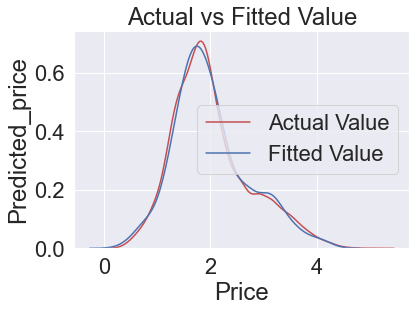

In [100]:
# Distribution plot to compare actual Price vs predicted Price
ax1=sns.distplot(df1['Price'], hist=False, color='r', label='Actual Value')
sns.distplot(pred_test, hist=False, color='b', label='Fitted Value', ax=ax1)

plt.title('Actual vs Fitted Value')
plt.xlabel('Price')
plt.ylabel('Predicted_price')
plt.legend()
plt.show()

### Lets look at model performances

In [101]:
# Mean absolute error on train and test
Sklearn_MAE_on_train=mean_absolute_error(y_train,pred_train)
Sklearn_MAE_on_test=mean_absolute_error(y_test,pred_test)
print('MAE on Train:',Sklearn_MAE_on_train)
print('MAE on Test:',Sklearn_MAE_on_test)

MAE on Train: 0.12003865647932124
MAE on Test: 0.13559584652191403


In [102]:
# Root mean squared error on train and test
Sklearn_RMSE_on_train=mean_squared_error(y_train,pred_train)**0.5
Sklearn_RMSE_on_test=mean_squared_error(y_test,pred_test)**0.5
print('RMSE_on_train:',Sklearn_RMSE_on_train)
print('RMSE_on_test:',Sklearn_RMSE_on_test)

RMSE_on_train: 0.16873123422394248
RMSE_on_test: 0.20661093035029582


In [103]:
# R2 Squared on train and test
Sklearn_R2_score_on_train=r2_score(y_train,pred_train)
Sklearn_R2_score_on_test=r2_score(y_test,pred_test)
print('R2_score_on_train:',Sklearn_R2_score_on_train)
print('R2_score_on_test:',Sklearn_R2_score_on_test)

R2_score_on_train: 0.946642080875114
R2_score_on_test: 0.9221280178991194


In [104]:
adj_r2_score_train=1-(1-ln.score(x_train,y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
adj_r2_score_test=1-(1-ln.score(x_test,y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

In [105]:
# R2 Squared on train and test
print('Sklearn_Adjusted_R2_score_on_train:',adj_r2_score_train)
print('Sklearn_Adjusted_R2_score_on_test:',adj_r2_score_test)

Sklearn_Adjusted_R2_score_on_train: 0.9435975015664471
Sklearn_Adjusted_R2_score_on_test: 0.9109039657709546


In [106]:
# MAPE on train and test
Sklearn_MAPE_on_train=mean_absolute_percentage_error(y_train,pred_train)
Sklearn_MAPE_on_test=mean_absolute_percentage_error(y_test,pred_test)
print('MAPE_on_train:',Sklearn_MAPE_on_train)
print('MAPE_on_test:',Sklearn_MAPE_on_test)

MAPE_on_train: 0.0682550865421
MAPE_on_test: 0.07632579244722526


##### SkLearn Results: 
* Root mean Squared Error of train and test data is not  different, indicating that our model is not overfitting the train data.  
* The units of both RMSE and MAE are same - Lakhs in this case. But RMSE is greater than MAE because it peanalises the outliers more. 
* Mean Absolute Percentage Error is ~7.6% on the test data.

### Lets build model using Statmodel to compare results

In [107]:
# Statsmodel does not add a constant by default. We need to add it explicitly.
x= sm.add_constant(x)
x_train1, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

olsmod0 = sm.OLS(y_train,x_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     335.2
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        13:24:59   Log-Likelihood:                 1604.5
No. Observations:                5077   AIC:                            -2735.
Df Residuals:                    4840   BIC:                            -1187.
Df Model:                         236                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

###### Lets check Multicollinearity of data

In [108]:
# We will use VIF, to check if there is multicollinearity in the data.
# Features having a VIF score >5 will be dropped/treated till all the features have a VIF score <5
# Drop the column which has VIF > 5 one by one
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(x_train1.values,i) for i in range(x_train1.shape[1])],index=x_train1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 0.000000
Year                  2.890993
Kilometers_Driven     1.809719
Seats                17.500003
Mileage_value         7.436195
                       ...    
Model_Zen                  inf
Model_Zest                 inf
Model_i10                  inf
Model_i20                  inf
Model_redi-GO              inf
Length: 275, dtype: float64



In [109]:
vif_series1.sort_values(ascending=False)

Model_Fabia      inf
Model_Linea      inf
Model_Logan      inf
Model_M-Class    inf
Model_MU         inf
                ... 
Model_Petra      NaN
Model_S80        NaN
Model_SLC        NaN
Model_Venture    NaN
Model_WR-V       NaN
Length: 275, dtype: float64

###### Removing columns which has VIF value > 5

In [110]:
# Creating formula for removing columns which has VIF value > 5

def calculate_vif_(X,thresh=5.0):
    variables=list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif=[variance_inflation_factor(X.iloc[:, variables].values, ix)
             for ix in range(X.iloc[:, variables].shape[1])]
       
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('Dropping \''+ X.iloc[:,variables].columns[maxloc]+
                 '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True
           
           
    print("Remaining variables:")
    print(X.columns[variables])
    return X.iloc[:, variables] 

In [111]:
x_train2 = calculate_vif_(x_train1)

Dropping 'Fuel_Type_Electric' at index: 18
Dropping 'Brand_Audi' at index: 24
Dropping 'Brand_BMW' at index: 24
Dropping 'Brand_Bentley' at index: 24
Dropping 'Brand_Chevrolet' at index: 24
Dropping 'Brand_Datsun' at index: 24
Dropping 'Brand_Fiat' at index: 24
Dropping 'Brand_Force' at index: 24
Dropping 'Brand_Ford' at index: 24
Dropping 'Brand_Hindustan' at index: 24
Dropping 'Brand_Honda' at index: 24
Dropping 'Brand_Hyundai' at index: 24
Dropping 'Brand_ISUZU' at index: 24
Dropping 'Brand_Isuzu' at index: 24
Dropping 'Brand_Jaguar' at index: 24
Dropping 'Brand_Jeep' at index: 24
Dropping 'Brand_Lamborghini' at index: 24
Dropping 'Brand_Land' at index: 24
Dropping 'Brand_Mahindra' at index: 24
Dropping 'Brand_Mini' at index: 26
Dropping 'Brand_Mitsubishi' at index: 26
Dropping 'Brand_Nissan' at index: 26
Dropping 'Brand_OpelCorsa' at index: 26
Dropping 'Brand_Porsche' at index: 26
Dropping 'Brand_Renault' at index: 26
Dropping 'Brand_Skoda' at index: 26
Dropping 'Brand_Smart' at in

In [112]:
# Check whether multicolinearity removed or not
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(x_train2.values,i) for i in range(x_train2.shape[1])],index=x_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Location_Bangalore     0.407310
Location_Chennai       1.111233
Location_Coimbatore    0.119753
Location_Delhi         1.690884
Location_Hyderabad     0.887729
                         ...   
Model_Zen              1.146664
Model_Zest             1.110479
Model_i10              1.839550
Model_i20              2.224872
Model_redi-GO          1.043062
Length: 233, dtype: float64



In [113]:
vif_series1.sort_values(ascending=False)

Model_City       2.358809
Model_i20        2.224872
Model_i10        1.839550
Model_Alto       1.838437
Model_Grand      1.835929
                   ...   
Model_Petra           NaN
Model_S80             NaN
Model_SLC             NaN
Model_Venture         NaN
Model_WR-V            NaN
Length: 233, dtype: float64

In [114]:
# Since all the VIF values are below 5. Lets us now try check for the R2 and adjusted R2

In [115]:
# fit the OLS model after removing multicollinearity using remaining features
olsmodel1 = sm.OLS(y_train, x_train2)
olsres1 = olsmodel1.fit()

print(olsres1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              1275.
Date:                Thu, 05 May 2022   Prob (F-statistic):                        0.00
Time:                        14:28:13   Log-Likelihood:                         -685.08
No. Observations:                5077   AIC:                                      1820.
Df Residuals:                    4852   BIC:                                      3290.
Df Model:                         225                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

##### Lets perform Significance test- Drop column having P values more than 0.05

In [116]:
# H0 = X and Y are Insignificant
# H1 = X and Y are Significant

In [117]:
# Drop column having P value > 0.05
cols = x_train2.columns.tolist()
max_p_value = 1
while len(cols) > 0:
    # Defining the train set
    x_train2_aux = x_train2[cols]
    # fitting model
    model = sm.OLS(y_train, x_train2_aux).fit()
    # Getting the p-value and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
    # name the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break
           

selected_features = cols
print(selected_features)

['Location_Bangalore', 'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad', 'Location_Kochi', 'Location_Kolkata', 'Fuel_Type_Petrol', 'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third', 'Model_1.4Gsi', 'Model_1000', 'Model_3', 'Model_370Z', 'Model_5', 'Model_6', 'Model_7', 'Model_800', 'Model_A', 'Model_A-Star', 'Model_A3', 'Model_A4', 'Model_A6', 'Model_A7', 'Model_A8', 'Model_Abarth', 'Model_Accent', 'Model_Accord', 'Model_Alto', 'Model_Amaze', 'Model_Ameo', 'Model_Aspire', 'Model_Aveo', 'Model_Avventura', 'Model_B', 'Model_BR-V', 'Model_BRV', 'Model_Baleno', 'Model_Beat', 'Model_Beetle', 'Model_Bolero', 'Model_Bolt', 'Model_Boxster', 'Model_Brio', 'Model_C-Class', 'Model_CLA', 'Model_CLS-Class', 'Model_CR-V', 'Model_Camry', 'Model_Captiva', 'Model_Captur', 'Model_Cayenne', 'Model_Cayman', 'Model_Cedia', 'Model_Celerio', 'Model_Ciaz', 'Model_City', 'Model_Civic', 'Model_Classic', 'Model_Clubman', 'Model_Compass', 'Model_Continental', 'Model_Cooper', 'Model

In [118]:
# Again Re-run the OLS model

olsmodel2 = sm.OLS(y_train, x_train2_aux)
olsres2 = olsmodel2.fit()

print(olsres2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              1304.
Date:                Thu, 05 May 2022   Prob (F-statistic):                        0.00
Time:                        14:28:18   Log-Likelihood:                         -688.64
No. Observations:                5077   AIC:                                      1817.
Df Residuals:                    4857   BIC:                                      3254.
Df Model:                         220                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [119]:
residual=olsres2.resid
fitted=olsres2.fittedvalues
x_test_final=x_test[x_train2_aux.columns]
y_pred=olsres2.predict(x_test_final)

#### Lets look at model performances on after removing insignificant features

In [120]:
# Mean absolute error on train and test
Statmodel_MAE_on_train=mean_absolute_error(y_train,fitted)
Statmodel_MAE_on_test=mean_absolute_error(y_test,y_pred)
print('MAE on Train:',Statmodel_MAE_on_train)
print('MAE on Test:',Statmodel_MAE_on_test)

MAE on Train: 0.19394810119163186
MAE on Test: 0.2103634103615419


In [121]:
# Root mean squared error on train and test
Statmodel_RMSE_on_train=mean_squared_error(y_train,fitted)**0.5
Statmodel_RMSE_on_test=mean_squared_error(y_test,y_pred)**0.5
print('RMSE_on_train:',Statmodel_RMSE_on_train)
print('RMSE_on_test:',Statmodel_RMSE_on_test)

RMSE_on_train: 0.27712151157378606
RMSE_on_test: 0.3441065299190404


In [122]:
# R2 Squared on train and test
Statmodel_R2_score_on_train=r2_score(y_train,fitted)
Statmodel_R2_score_on_test=r2_score(y_test,y_pred)
print('R2_score_on_train:',Statmodel_R2_score_on_train)
print('R2_score_on_test:',Statmodel_R2_score_on_test)

R2_score_on_train: 0.8577013943345516
R2_score_on_test: 0.7782095242644848


In [123]:
# MAPE on train and test
Statmodel_MAPE_on_train=mean_absolute_percentage_error(y_train,fitted)
Statmodel_MAPE_on_test=mean_absolute_percentage_error(y_test,y_pred)
print('MAPE_on_train:',Statmodel_MAPE_on_train)
print('MAPE_on_test:',Statmodel_MAPE_on_test)

MAPE_on_train: 0.10923876618981447
MAPE_on_test: 0.11739159835912724


## Checking the Linear Regression Assumptions

1. **Linearity of variables**
2. **Normality of error terms**
3. **No Heteroscedasticity**
       * Test of Homoscedasticity: 
        Goldfeld Quandt test -Used in regression analysis.
        p should be more than 0.05 for Homoscedasticity.
4. **No Multicolinearity**
5. **Independance of error from predictor variables**

* 1. We have already removed multicollinearity from data by dropping features having VIF more than 5

In [124]:
##  Now lets check whether Mean of residual should be zero
residual=olsres2.resid
np.mean(residual)

0.0010781872382734385

* Mean of residuals is very close to 0. The second assumption is also satisfied.

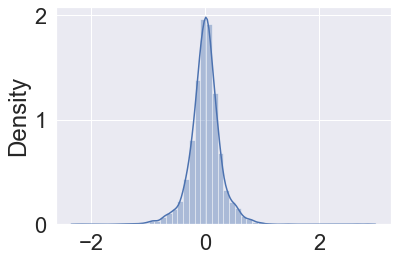

In [125]:
##  Test for normality
## Errors should be normally distributed.
sns.distplot(residual)

plt.show()

* The residuals have a close to normal distribution. 

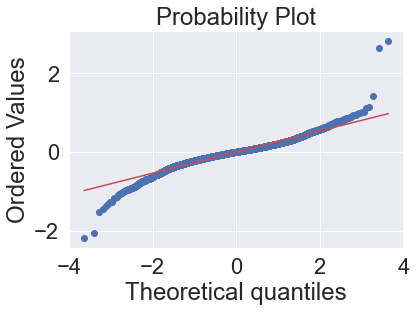

In [126]:
## QQ plot for residuals can be used to visually check the normality assumption
import pylab
import scipy.stats as stats
stats.probplot(residual,dist='norm',plot=pylab)
plt.show()

In [127]:
## 3.Test for homoscedasticity goldfeldquandt test
# H0=residual are homoscedastic
# H1= residual are hetroscedastic
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name=['F statistic', 'p-value']
test= sms.het_goldfeldquandt(residual,x_train2_aux)
lzip(name,test)

[('F statistic', 0.9683467485957031), ('p-value', 0.7818620177028414)]

* P Value>0.05 hence residuals are homoscedastic.

In [128]:
residual=olsres2.resid
fitted=olsres2.fittedvalues #predicted values

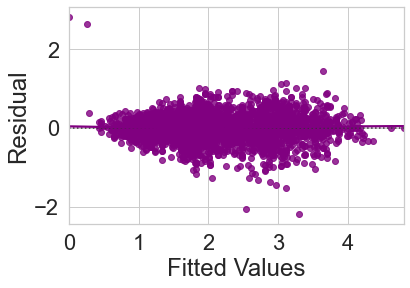

In [129]:
sns.set_style('whitegrid')
sns.residplot(fitted,residual,color='purple',lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residual')

plt.show()

* There is no pattern in the residual vs fitted values plot.

**All assumptions of linear regression are checked and are fulfilled**

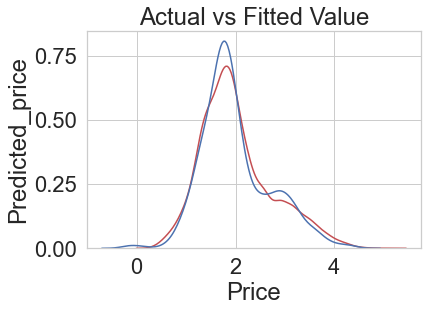

In [130]:
# Distribution plot to compare actual Price vs predicted Price
ax1=sns.distplot(df1['Price'], hist=False, color='r', label='Actual Value')
sns.distplot(y_pred, hist=False, color='b', label='Fitted Value', ax=ax1)

plt.title('Actual vs Fitted Value')
plt.xlabel('Price')
plt.ylabel('Predicted_price')
plt.show()

### Observations from the model

* With our linear regression model we have been able to capture 78% variation in our data.
* Our final Linear Regression model has a MAPE of 12% on the test data, which means that we are able to predict within 12% of   the price value. This is  good model but can be further improved by regularization

<p style = "font-size : 28px ; color: blue;font-family:TimesNewRoman">
    <b>2. Decision Tree Regressor</b></p>

In [131]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [132]:
# Defining X and Y variables

x= df1.drop(['Price'],axis=1)
y= df1[['Price']]

print(x.head())
print(y.head())

       Location      Year  Kilometers_Driven Fuel_Type Transmission  \
7155     Mumbai  7.608374              45000    Diesel    Automatic   
3124    Chennai  7.609367              89000    Diesel       Manual   
455   Hyderabad  7.609367              80219    Diesel       Manual   
5216    Chennai  7.606885              53416    Diesel    Automatic   
1178      Kochi  7.608374              86925    Diesel    Automatic   

     Owner_Type     Seats          Brand    Model  Mileage_value  \
7155      First  1.791759  Mercedes-Benz      New          19.27   
3124      First  2.079442       Mahindra   XUV500          16.00   
455       First  1.791759         Maruti  Celerio          27.62   
5216      First  1.791759     Volkswagen    Jetta          16.96   
1178      First  1.791759          Volvo     XC60          11.20   

      Engine_value  Power_value  
7155      7.670429     5.127648  
3124      7.687080     4.948760  
455       6.677083     3.871201  
5216      7.585281     4.935

In [133]:
print(x.shape)
print(y.shape)

(7253, 12)
(7253, 1)


In [134]:
catagorical_columns = x.columns[x.dtypes == 'object']

catagorical_columns

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')

In [135]:
x= pd.get_dummies(x,columns=catagorical_columns,drop_first=True)
x.head()

,Year,Kilometers_Driven,Seats,Mileage_value,Engine_value,Power_value,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Model_Xcent,Model_Xenon,Model_Xylo,Model_Yeti,Model_Z4,Model_Zen,Model_Zest,Model_i10,Model_i20,Model_redi-GO
7155,7.608374,45000,1.791759,19.27,7.670429,5.127648,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3124,7.609367,89000,2.079442,16.00,7.687080,4.948760,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
455,7.609367,80219,1.791759,27.62,6.677083,3.871201,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5216,7.606885,53416,1.791759,16.96,7.585281,4.935193,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1178,7.608374,86925,1.791759,11.20,7.783641,5.375278,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
# split the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=50)
feature_names=list(x.columns)

In [137]:
print(x_train.shape)
print(y_train.shape)

(5077, 274)
(5077, 1)


#### Choose Model,Train and Evaluate

In [138]:
model= DecisionTreeRegressor(random_state=1)

In [139]:
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [140]:
pred_train=model.predict(x_train)
pred_test=model.predict(x_test)

In [141]:
# Mean absolute error on train and test
MAE_train1=mean_absolute_error(y_train,pred_train)
MAE_test1=mean_absolute_error(y_test,pred_test)
print('MAE on Train:',MAE_train1)
print('MAE on Test:',MAE_test1)

MAE on Train: 0.0006218319541269671
MAE on Test: 0.1814962226648507


In [142]:
# Root mean squared error on train and test
RMSE_train1=mean_squared_error(y_train,pred_train)**0.5
RMSE_test1=mean_squared_error(y_test,pred_test)**0.5
print('RMSE_on_train:',RMSE_train1)
print('RMSE_on_test:',RMSE_test1)

RMSE_on_train: 0.00819357292540752
RMSE_on_test: 0.27469393622062066


In [143]:
# R2 Squared on train and test
R2_train1=r2_score(y_train,pred_train)
R2_test1=r2_score(y_test,pred_test)
print('R2_score_on_train:',R2_train1)
print('R2_score_on_test:',R2_test1)

R2_score_on_train: 0.9998769998852587
R2_score_on_test: 0.854770094484131


In [144]:
# MAPE on train and test
MAPE_train1=mean_absolute_percentage_error(y_train,pred_train)
MAPE_test1=mean_absolute_percentage_error(y_test,pred_test)
print('MAPE_on_train:',MAPE_train1)
print('MAPE_on_test:',MAPE_test1)

MAPE_on_train: 0.00035988336246294336
MAPE_on_test: 0.10070328120554695


### Visualising Decision Tree

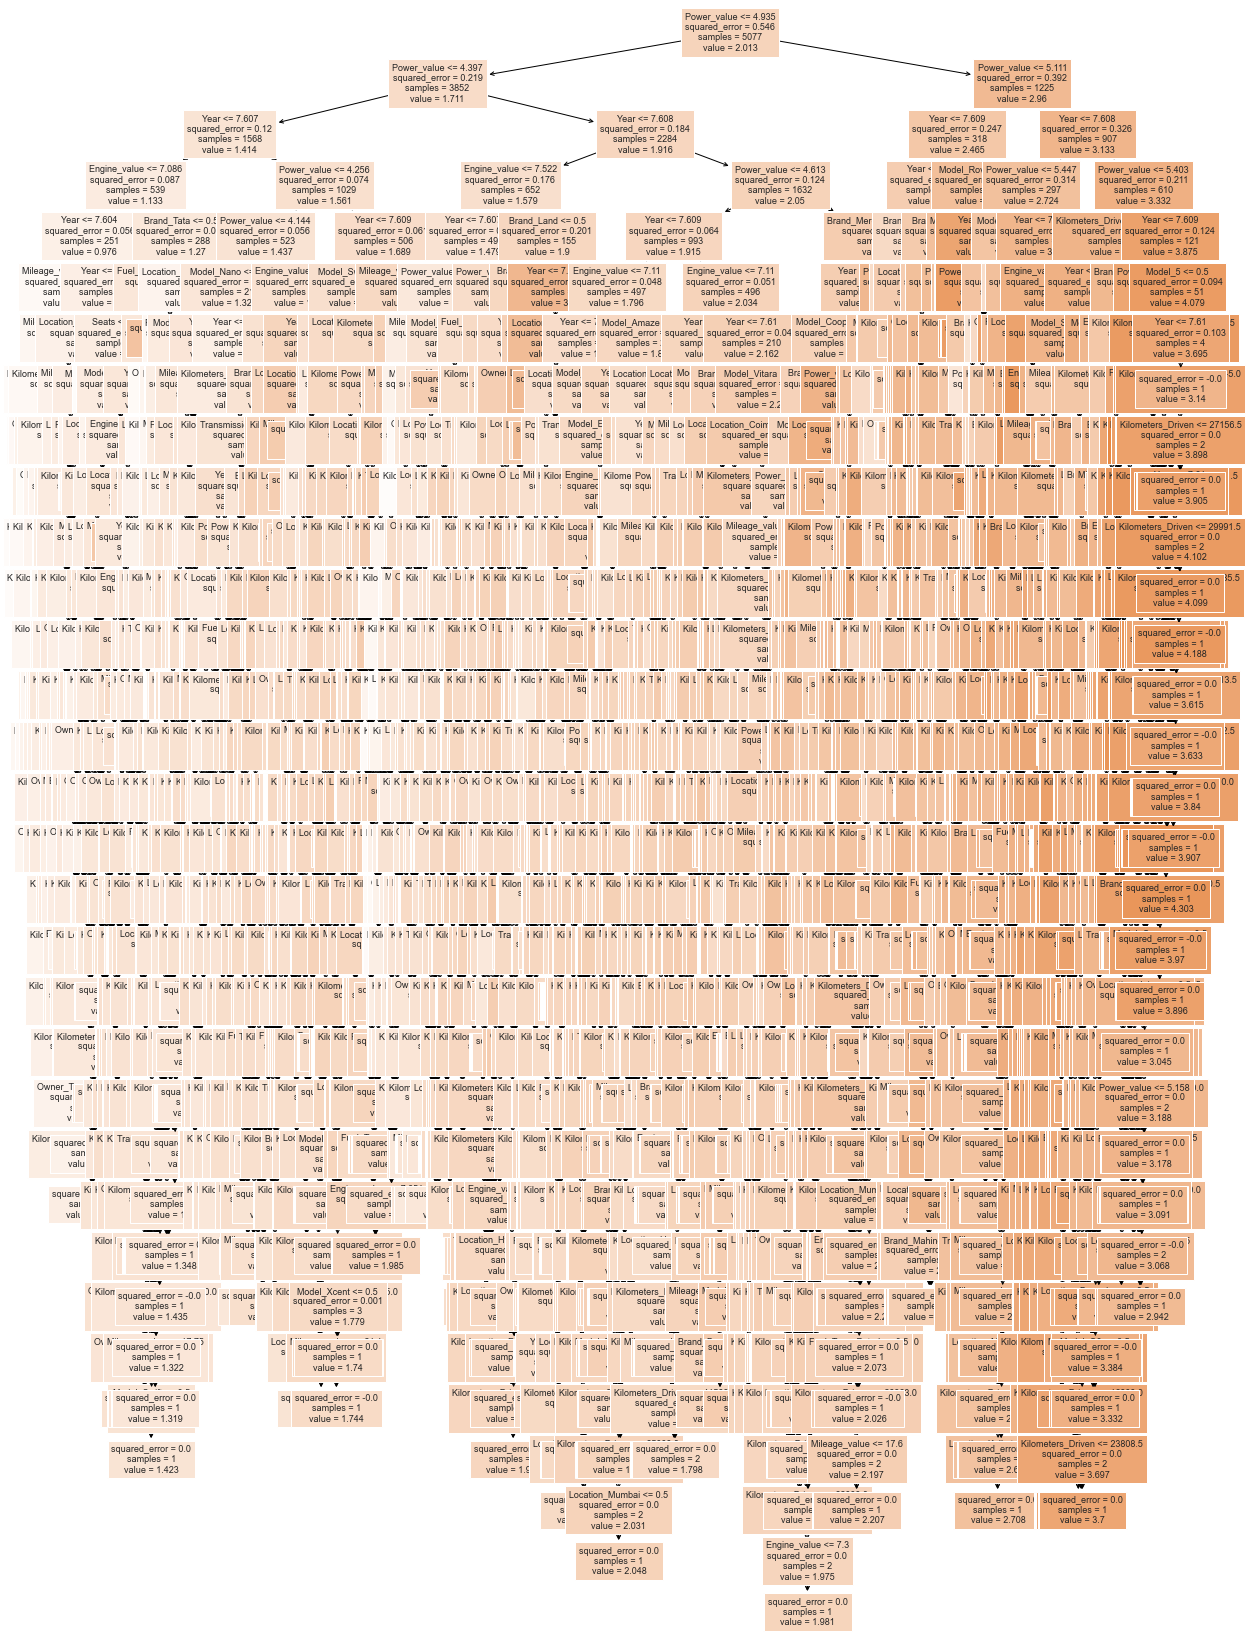

In [145]:
plt.figure(figsize=(20,30))
out= tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
 #below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow=o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [146]:
# Text report showing the rules of a decision tree-

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Power_value <= 4.94
|   |--- Power_value <= 4.40
|   |   |--- Year <= 7.61
|   |   |   |--- Engine_value <= 7.09
|   |   |   |   |--- Year <= 7.60
|   |   |   |   |   |--- Mileage_value <= 17.75
|   |   |   |   |   |   |--- Location_Kochi <= 0.50
|   |   |   |   |   |   |   |--- Kilometers_Driven <= 97087.00
|   |   |   |   |   |   |   |   |--- Owner_Type_Second <= 0.50
|   |   |   |   |   |   |   |   |   |--- Location_Pune <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Year <= 7.60
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.43]
|   |   |   |   |   |   |   |   |   |   |--- Year >  7.60
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- Location_Pune >  0.50
|   |   |   |   |   |   |   |   |   |   |--- Year <= 7.60
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.44]
|   |   |   |   |   |   |   |   |   |   |--- Year >  7.60
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.41

#### Check Feature Importance using Decision Tree

In [147]:
# Importance of feature in the tree building (The importance of feature is computed as the (normalized)total reduction of the
# criterion brought by that feature. It is also known as the Gini Importance)

print(pd.DataFrame(model.feature_importances_,columns=['Imp'],index=x_train.columns).sort_values(by='Imp',ascending=False))

                        Imp
Power_value        0.706065
Year               0.143321
Engine_value       0.022027
Kilometers_Driven  0.019113
Mileage_value      0.012523
...                     ...
Model_E            0.000000
Model_Eeco         0.000000
Model_Esteem       0.000000
Model_Estilo       0.000000
Model_Flying       0.000000

[274 rows x 1 columns]


#### Model seems overfitted  Lets check performance of model after tunning hyperparameters using randomized search cv

In [148]:
# Choose the type of Regressor
estimator=DecisionTreeRegressor(random_state=1)

#Grid of parameters to choose from

parameters={
    'max_depth':np.arange(1,10),
    'splitter':['best','random'],
    "min_samples_leaf":np.arange(1,15),    
    'max_features':['auto','log2','sqrt']
    }

# Type of scoring used to compare parameter combination
scorer=metrics.make_scorer(metrics.r2_score)

# Run the randomized search
grid_obj=RandomizedSearchCV(estimator,parameters,scoring=scorer,cv=5)
grid_obj=grid_obj.fit(x_train,y_train)

#set the clf to thebest combination of parameteres
estimator=grid_obj.best_estimator_

#fit the best algorithm to the data
estimator.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_leaf=13,
                      random_state=1, splitter='random')

In [149]:
# Lets predict train and test values
pred_train=estimator.predict(x_train)
pred_test=estimator.predict(x_test)

In [150]:
# Mean absolute error on train and test
MAE_train2=mean_absolute_error(y_train,pred_train)
MAE_test2=mean_absolute_error(y_test,pred_test)
print('MAE on Train:',MAE_train2)
print('MAE on Test:',MAE_test2)

MAE on Train: 0.2559878458703023
MAE on Test: 0.26001806849079334


In [151]:
# Root mean squared error on train and test
RMSE_train2=mean_squared_error(y_train,pred_train)**0.5
RMSE_test2=mean_squared_error(y_test,pred_test)**0.5
print('RMSE_on_train:',RMSE_train2)
print('RMSE_on_test:',RMSE_test2)

RMSE_on_train: 0.3470083394208694
RMSE_on_test: 0.3529921234682948


In [152]:
# R2 Squared on train and test
R2_train2=r2_score(y_train,pred_train)
R2_test2=r2_score(y_test,pred_test)
print('R2_score_on_train:',R2_train2)
print('R2_score_on_test:',R2_test2)

R2_score_on_train: 0.7793831426824205
R2_score_on_test: 0.7601785970794535


In [153]:
# MAPE on train and test
MAPE_train2=mean_absolute_percentage_error(y_train,pred_train)
MAPE_test2=mean_absolute_percentage_error(y_test,pred_test)
print('MAPE_on_train:',MAPE_train2)
print('MAPE_on_test:',MAPE_test2)

MAPE_on_train: 0.14602146289854154
MAPE_on_test: 0.14927479633420565


### Visualizing decision tree

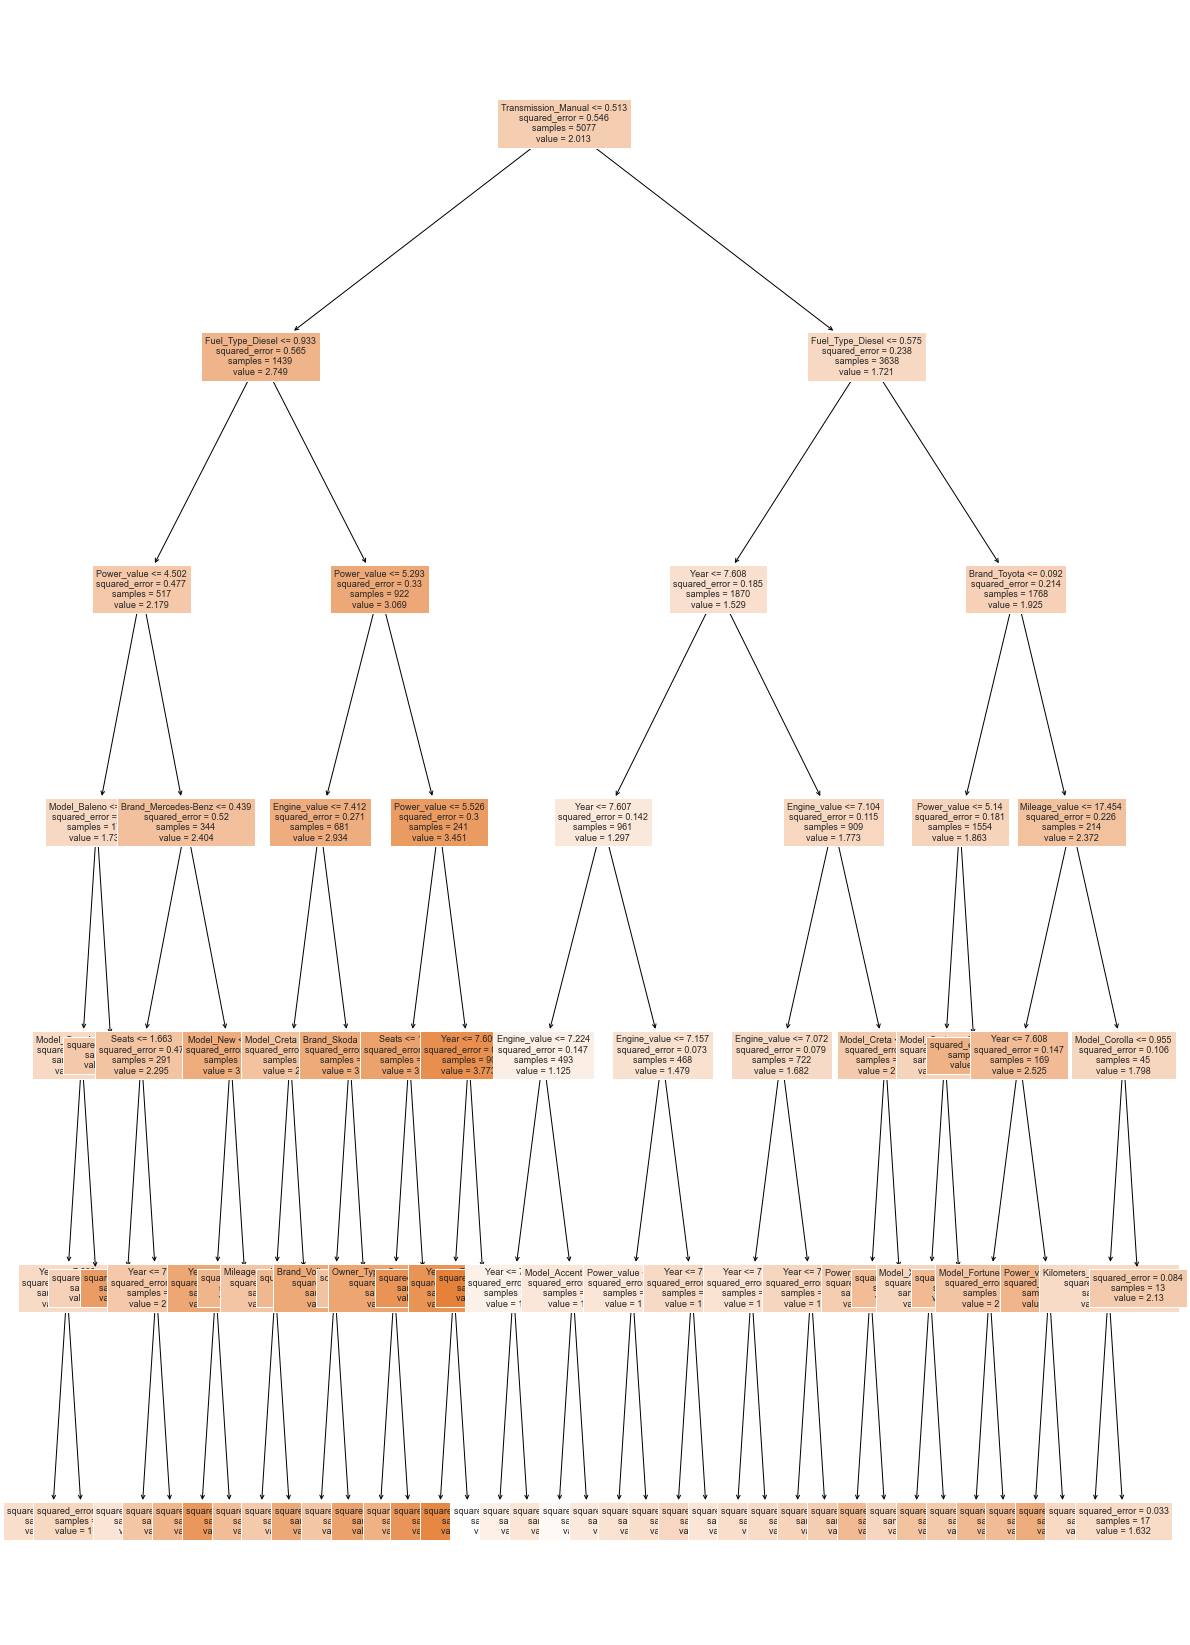

In [154]:
plt.figure(figsize=(20,30))
out= tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
 #below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow=o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

### Feature Importance

In [155]:
# Importance of feature in the tree building (The importance of feature is computed as the (normalized)total reduction of the
# criterion brought by that feature. It is also known as the Gini Importance)

print(pd.DataFrame(estimator.feature_importances_,columns=['Imp'],index=x_train.columns).sort_values(by='Imp',ascending=False))

                          Imp
Transmission_Manual  0.504765
Fuel_Type_Diesel     0.187475
Year                 0.083334
Power_value          0.070569
Engine_value         0.045184
...                       ...
Model_Classic        0.000000
Model_Clubman        0.000000
Model_Compass        0.000000
Model_Continental    0.000000
Model_redi-GO        0.000000

[274 rows x 1 columns]


<p style = "font-size : 28px ; color: blue;font-family:TimesNewRoman">
    <b>3. Ensemble Learning Algorithms</b></p>

### A. Bagging Regressor

In [156]:
from sklearn.ensemble import BaggingRegressor

In [157]:
bagging = BaggingRegressor(random_state=5)
bagging.fit(x_train,y_train)

BaggingRegressor(random_state=5)

In [158]:
pred_train = bagging.predict(x_train)
pred_test = bagging.predict(x_test)

In [159]:
# Mean absolute error on train and test
MAE_train3=mean_absolute_error(y_train,pred_train)
MAE_test3=mean_absolute_error(y_test,pred_test)
print('MAE on Train:',MAE_train3)
print('MAE on Test:',MAE_test3)

MAE on Train: 0.05719036948231589
MAE on Test: 0.14853879362487832


In [160]:
# Root mean squared error on train and test
RMSE_train3=mean_squared_error(y_train,pred_train)**0.5
RMSE_test3=mean_squared_error(y_test,pred_test)**0.5
print('RMSE_on_train:',RMSE_train3)
print('RMSE_on_test:',RMSE_test3)

RMSE_on_train: 0.09061723041140735
RMSE_on_test: 0.22145977319088822


In [161]:
# R2 Squared on train and test
R2_train3=r2_score(y_train,pred_train)
R2_test3=r2_score(y_test,pred_test)
print('R2_score_on_train:',R2_train3)
print('R2_score_on_test:',R2_test3)

R2_score_on_train: 0.9849554071625028
R2_score_on_test: 0.9056052998658869


In [162]:
# MAPE on train and test
MAPE_train3=mean_absolute_percentage_error(y_train,pred_train)
MAPE_test3=mean_absolute_percentage_error(y_test,pred_test)
print('MAPE_on_train:',MAPE_train3)
print('MAPE_on_test:',MAPE_test3)

MAPE_on_train: 0.03223826904121583
MAPE_on_test: 0.08339695121313041


### B. Random Forest Regressor

In [163]:
from sklearn.ensemble import RandomForestRegressor

In [164]:
rf= RandomForestRegressor(random_state=5)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=5)

In [165]:
pred_train = rf.predict(x_train)
pred_test = rf.predict(x_test)

In [166]:
# Mean absolute error on train and test
MAE_train4=mean_absolute_error(y_train,pred_train)
MAE_test4=mean_absolute_error(y_test,pred_test)
print('MAE on Train:',MAE_train4)
print('MAE on Test:',MAE_test4)

MAE on Train: 0.049684749214485055
MAE on Test: 0.1399460983907045


In [167]:
# Root mean squared error on train and test
RMSE_train4=mean_squared_error(y_train,pred_train)**0.5
RMSE_test4=mean_squared_error(y_test,pred_test)**0.5
print('RMSE_on_train:',RMSE_train4)
print('RMSE_on_test:',RMSE_test4)

RMSE_on_train: 0.07358752105653234
RMSE_on_test: 0.2108330665232292


In [168]:
# R2 Squared on train and test
R2_train4=r2_score(y_train,pred_train)
R2_test4=r2_score(y_test,pred_test)
print('R2_score_on_train:',R2_train4)
print('R2_score_on_test:',R2_test4)

R2_score_on_train: 0.9900787312082133
R2_score_on_test: 0.9144469768474569


In [169]:
# MAPE on train and test
MAPE_train4=mean_absolute_percentage_error(y_train,pred_train)
MAPE_test4=mean_absolute_percentage_error(y_test,pred_test)
print('MAPE_on_train:',MAPE_train4)
print('MAPE_on_test:',MAPE_test4)

MAPE_on_train: 0.027985210128459528
MAPE_on_test: 0.07894976432314368


#### Check Feature Importance using random forest

In [170]:
# Importance of feature in the tree building (The importance of feature is computed as the (normalized)total reduction of the
# criterion brought by that feature. It is also known as the Gini Importance)

print(pd.DataFrame(rf.feature_importances_,columns=['Imp'],index=x_train.columns).sort_values(by='Imp',ascending=False))

                        Imp
Power_value        0.696971
Year               0.157571
Engine_value       0.026903
Kilometers_Driven  0.017842
Mileage_value      0.013330
...                     ...
Model_Venture      0.000000
Model_Montero      0.000000
Model_F            0.000000
Model_Fortwo       0.000000
Brand_Smart        0.000000

[274 rows x 1 columns]


### C. Ada boost Regressor

In [171]:
from sklearn.ensemble import AdaBoostRegressor

In [172]:
ab_regressor=AdaBoostRegressor(random_state=1)

In [173]:
ab_regressor.fit(x_train,y_train)

AdaBoostRegressor(random_state=1)

In [174]:
pred_train=ab_regressor.predict(x_train)
pred_test=ab_regressor.predict(x_test)

In [175]:
# Mean absolute error on train and test
MAE_train5=mean_absolute_error(y_train,pred_train)
MAE_test5=mean_absolute_error(y_test,pred_test)
print('MAE on Train:',MAE_train5)
print('MAE on Test:',MAE_test5)

MAE on Train: 0.23421271592950643
MAE on Test: 0.2354172686844829


In [176]:
# Root mean squared error on train and test
RMSE_train5=mean_squared_error(y_train,pred_train)**0.5
RMSE_test5=mean_squared_error(y_test,pred_test)**0.5
print('RMSE_on_train:',RMSE_train5)
print('RMSE_on_test:',RMSE_test5)

RMSE_on_train: 0.2929703557112279
RMSE_on_test: 0.30069430989153606


In [177]:
# R2 Squared on train and test
R2_train5=r2_score(y_train,pred_train)
R2_test5=r2_score(y_test,pred_test)
print('R2_score_on_train:',R2_train5)
print('R2_score_on_test:',R2_test5)

R2_score_on_train: 0.8427443614416313
R2_score_on_test: 0.8259763275405426


In [178]:
# MAPE on train and test
MAPE_train5=mean_absolute_percentage_error(y_train,pred_train)
MAPE_test5=mean_absolute_percentage_error(y_test,pred_test)
print('MAPE_on_train:',MAPE_train5)
print('MAPE_on_test:',MAPE_test5)

MAPE_on_train: 0.13920432702749982
MAPE_on_test: 0.13867614167466435


### D. XGB Regressor

In [179]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [180]:
from xgboost.sklearn import XGBRegressor

In [181]:
xgb_estimator=XGBRegressor(random_state=1)

In [182]:
xgb_estimator.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [183]:
pred_train=xgb_estimator.predict(x_train)
pred_test=xgb_estimator.predict(x_test)

In [184]:
# Mean absolute error on train and test
MAE_train6=mean_absolute_error(y_train,pred_train)
MAE_test6=mean_absolute_error(y_test,pred_test)
print('MAE on Train:',MAE_train6)
print('MAE on Test:',MAE_test6)

MAE on Train: 0.08186418879597286
MAE on Test: 0.135927973329719


In [185]:
# Root mean squared error on train and test
RMSE_train6=mean_squared_error(y_train,pred_train)**0.5
RMSE_test6=mean_squared_error(y_test,pred_test)**0.5
print('RMSE_on_train:',RMSE_train6)
print('RMSE_on_test:',RMSE_test6)

RMSE_on_train: 0.11172235709535022
RMSE_on_test: 0.20378937756972598


In [186]:
# R2 Squared on train and test
R2_train6=r2_score(y_train,pred_train)
R2_test6=r2_score(y_test,pred_test)
print('R2_score_on_train:',R2_train6)
print('R2_score_on_test:',R2_test6)

R2_score_on_train: 0.9771314278513012
R2_score_on_test: 0.920067941916145


In [187]:
# MAPE on train and test
MAPE_train6=mean_absolute_percentage_error(y_train,pred_train)
MAPE_test6=mean_absolute_percentage_error(y_test,pred_test)
print('MAPE_on_train:',MAPE_train6)
print('MAPE_on_test:',MAPE_test6)

MAPE_on_train: 0.046592055338555476
MAPE_on_test: 0.07580614666953324


#### Check Feature Importance using XGB Regressor

In [188]:

print(pd.DataFrame(xgb_estimator.feature_importances_,columns=['Imp'],index=x_train.columns).sort_values(by='Imp',ascending=False))

                       Imp
Power_value       0.246775
Brand_Honda       0.058040
Model_Innova      0.029647
Brand_Mahindra    0.028928
Fuel_Type_Petrol  0.025663
...                    ...
Model_Fortwo      0.000000
Model_F           0.000000
Model_Estilo      0.000000
Model_Enjoy       0.000000
Model_redi-GO     0.000000

[274 rows x 1 columns]


#### Lets check performance of model after tunning hyperparameters using randomized search cv

In [189]:
## Choose the type of classifer
xgb_tuned=XGBRegressor(random_state=1)

#Grid of parameters to choose from

parameters={'n_estimators':[75,100,125,150,250],
            'subsample':[0.7,0.8,0.9,1],
            'gamma':[7,10,13,15],
            'colsample_bytree':[0.7,0.8,0.9,1],
            'colsample_bylevel':[0.7,0.8,0.9,1],
             
           }

# Type of scoring used to compare parameter combinations
scorer=metrics.make_scorer(metrics.r2_score)

# Run the Randomized search
grid_obj=RandomizedSearchCV(xgb_tuned,parameters,scoring=scorer,cv=5)
grid_obj=grid_obj.fit(x_train,y_train)

#set the clf to thebest combination of parameteres
xgb_tuned=grid_obj.best_estimator_

#fit the best algorithm to the data
xgb_tuned.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=7, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [190]:
pred_train=xgb_tuned.predict(x_train)
pred_test=xgb_tuned.predict(x_test)

In [191]:
# Mean absolute error on train and test
MAE_train7=mean_absolute_error(y_train,pred_train)
MAE_test7=mean_absolute_error(y_test,pred_test)
print('MAE on Train:',MAE_train7)
print('MAE on Test:',MAE_test7)

MAE on Train: 0.17799913570877318
MAE on Test: 0.18050791201691202


In [192]:
# Root mean squared error on train and test
RMSE_train7=mean_squared_error(y_train,pred_train)**0.5
RMSE_test7=mean_squared_error(y_test,pred_test)**0.5
print('RMSE_on_train:',RMSE_train7)
print('RMSE_on_test:',RMSE_test7)

RMSE_on_train: 0.24152324851361384
RMSE_on_test: 0.24833392545777255


In [193]:
# R2 Squared on train and test
R2_train7=r2_score(y_train,pred_train)
R2_test7=r2_score(y_test,pred_test)
print('R2_score_on_train:',R2_train7)
print('R2_score_on_test:',R2_test7)

R2_score_on_train: 0.8931248462647583
R2_score_on_test: 0.8813056581414762


In [194]:
# MAPE on train and test
MAPE_train7=mean_absolute_percentage_error(y_train,pred_train)
MAPE_test7=mean_absolute_percentage_error(y_test,pred_test)
print('MAPE_on_train:',MAPE_train7)
print('MAPE_on_test:',MAPE_test7)

MAPE_on_train: 0.10171639852406426
MAPE_on_test: 0.10245896835510775


#### Check Feature Importance

In [195]:

print(pd.DataFrame(xgb_tuned.feature_importances_,columns=['Imp'],index=x_train.columns).sort_values(by='Imp',ascending=False))

                          Imp
Power_value          0.263324
Engine_value         0.123699
Transmission_Manual  0.117778
Model_XUV500         0.084679
Year                 0.082287
...                       ...
Model_Classic        0.000000
Model_Clubman        0.000000
Model_Compass        0.000000
Model_Continental    0.000000
Model_redi-GO        0.000000

[274 rows x 1 columns]


### Comparision Table:

In [196]:
data={"Model Name":['Linear SKLearn','Linear Stats Model','Decision Tree Regressor','Tunned Decision Tree','Bagging Regressor','Random Forest','Ada Boost Regressor','XG Boost Regressor','Tunned XG Boost Regressor'],
      "Train(MAE)":[Sklearn_MAE_on_train,Statmodel_MAE_on_train,MAE_train1,MAE_train2,MAE_train3,MAE_train4,MAE_train5,MAE_train6,MAE_train7 ],
      "Test(MAE)":[Sklearn_MAE_on_test,Statmodel_MAE_on_test,MAE_test1,MAE_test2,MAE_test3,MAE_test4,MAE_test5,MAE_test6,MAE_test7],
       "Train(RMSE)":[Sklearn_RMSE_on_train,Statmodel_RMSE_on_train,RMSE_train1,RMSE_train2,RMSE_train3,RMSE_train4,RMSE_train5,RMSE_train6,RMSE_train7],
      "Test(RMSE)":[Sklearn_RMSE_on_test,Statmodel_RMSE_on_test,RMSE_test1,RMSE_test2,RMSE_test3,RMSE_test4,RMSE_test5,RMSE_test6,RMSE_test7],
      "Train(R2_score)":[Sklearn_R2_score_on_train,Statmodel_R2_score_on_train,R2_train1,R2_train2,R2_train3,R2_train4,R2_train5,R2_train6,R2_train7],
      "Test(R2_score)":[Sklearn_R2_score_on_test,Statmodel_R2_score_on_test,R2_test1,R2_test2,R2_test3,R2_test4,R2_test5,R2_test6,R2_test7],
      "Train(MAPE)":[Sklearn_MAPE_on_train,Statmodel_MAPE_on_train,MAPE_train1,MAPE_train2,MAPE_train3,MAPE_train4,MAPE_train5,MAPE_train6,MAPE_train7],
      "Test(MAPE)":[Sklearn_MAPE_on_test,Statmodel_MAPE_on_test,MAPE_test1,MAPE_test2,MAPE_test3,MAPE_test4,MAPE_test5,MAPE_test6,MAPE_test7]}

In [197]:
pd.DataFrame(data)

,Model Name,Train(MAE),Test(MAE),Train(RMSE),Test(RMSE),Train(R2_score),Test(R2_score),Train(MAPE),Test(MAPE)
0,Linear SKLearn,0.120039,0.135596,0.168731,0.206611,0.946642,0.922128,0.068255,0.076326
1,Linear Stats Model,0.193948,0.210363,0.277122,0.344107,0.857701,0.778210,0.109239,0.117392
2,Decision Tree Regressor,0.000622,0.181496,0.008194,0.274694,0.999877,0.854770,0.000360,0.100703
3,Tunned Decision Tree,0.255988,0.260018,0.347008,0.352992,0.779383,0.760179,0.146021,0.149275
4,Bagging Regressor,0.057190,0.148539,0.090617,0.221460,0.984955,0.905605,0.032238,0.083397
5,Random Forest,0.049685,0.139946,0.073588,0.210833,0.990079,0.914447,0.027985,0.078950
6,Ada Boost Regressor,0.234213,0.235417,0.292970,0.300694,0.842744,0.825976,0.139204,0.138676
7,XG Boost Regressor,0.081864,0.135928,0.111722,0.203789,0.977131,0.920068,0.046592,0.075806
8,Tunned XG Boost Regressor,0.177999,0.180508,0.241523,0.248334,0.893125,0.881306,0.101716,0.102459


### Observations from the models

* From above comparision sheet performance of almost all models is satisfactory. whereas model performance with SKlearn and XG Boost regressor is good in comparision to others. 
* With this two models we are able to capture 92% of variation in our data.
* The model indicates that the most significant predictors of price of used cars are -
             
    - Model 
    - Year
    - Location 
    - Brand
    - OwnerType
    - Power
    - Fuel_Type
* Owner type have negative correlation with price. As owner type changes from first to second to third price of vehicle is decreases when everything else is constant. 
* The categorical variables are a little hard to interpret. But it can be seen that all the car_category variables in the dataset have a negative relationship with the Price and the magnitude of this negative relationship decrease as the brand category moves to lower brands.
* Power and Fuel type are also somehow contributing factor in price of cars.
* Manufacturing year represents age of the car, it is common sense that it is one of the contributing factor. Increase in age leads to decrease in price.